In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [3]:
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [4]:
trainy[1]

array([9], dtype=uint8)

In [5]:
!git clone https://github.com/sam360digitmg/AI-Datasets.git

Cloning into 'AI-Datasets'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 3 (delta 0), pack-reused 29
Unpacking objects: 100% (33/33), 200.94 MiB | 12.75 MiB/s, done.


In [6]:
from zipfile import ZipFile
file_name = "/content/AI-Datasets/CNN/Animals.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:

#Pretrained model
import os, shutil

base_dir = '/content/cats and dogs small'
train_dir = '/content/cats and dogs small/train'
validation_dir = '/content/cats and dogs small/validation'
test_dir = '/content/cats and dogs small/test'
train_cats_dir = '/content/cats and dogs small/train/cats'
train_dogs_dir = '/content/cats and dogs small/train/dogs'
validation_cats_dir = '/content/cats and dogs small/validation/cats'
validation_dogs_dir = '/content/cats and dogs small/validation/dogs'
test_cats_dir = '/content/cats and dogs small/test/cats'
test_dogs_dir = '/content/cats and dogs small/test/dogs'


print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1002
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')


Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

<ipython-input-10-e44457651a6e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 22s 105ms/step - loss: 0.7210 - acc: 0.5131 - val_loss: 0.6922 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6927 - acc: 0.5298 - val_loss: 0.6779 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6768 - acc: 0.5636 - val_loss: 0.6565 - val_acc: 0.5920
Epoch 4/30
100/100 [==============================] - 10s 95ms/step - loss: 0.6477 - acc: 0.6236 - val_loss: 0.6285 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.6068 - acc: 0.6594 - val_loss: 0.5868 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5662 - acc: 0.7059 - val_loss: 0.5750 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 12s 125ms/step - loss: 0.5208 - acc: 0.7356 - val_loss: 0.5454 - val_acc: 0.7260
Epoch 8/30
100/100 [==============================] - 10

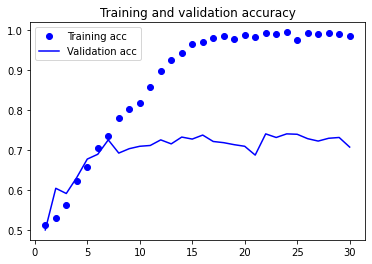

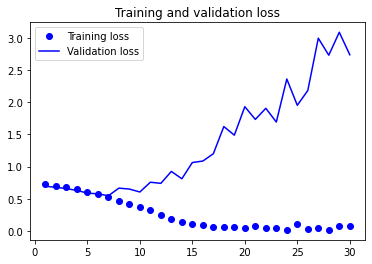

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

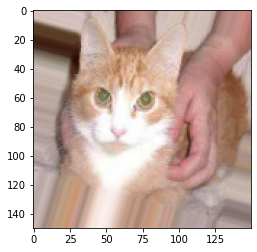

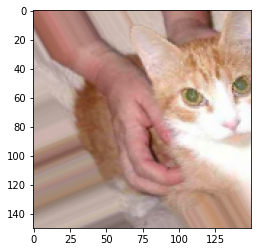

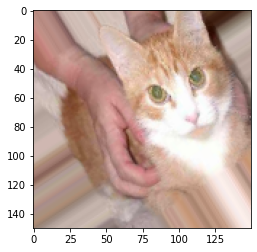

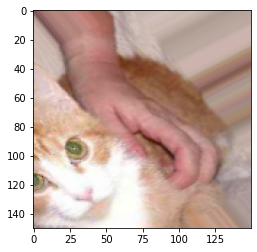

In [12]:
# Data Augmentation for Increasing Accuracy & Avoiding Overfitting
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [13]:
# Using Pretrained Model
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

conv_base.summary()



58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/cats and dogs small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,we must `break` after every image has been seen once.
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2002 images belonging to 2 classes.
1/1 [==============================] - 0s 29ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 22ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 22ms/step


In [15]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.7508 - acc: 0.7530 - val_loss: 0.2709 - val_acc: 0.8960
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3385 - acc: 0.8545 - val_loss: 0.2624 - val_acc: 0.8880
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2737 - acc: 0.8885 - val_loss: 0.3043 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2553 - acc: 0.8930 - val_loss: 0.2702 - val_acc: 0.8960
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2028 - acc: 0.9210 - val_loss: 0.3176 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.1793 - acc: 0.9290 - val_loss: 0.2648 - val_acc: 0.9060
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1682 - acc: 0.9340 - val_loss: 0.3234 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

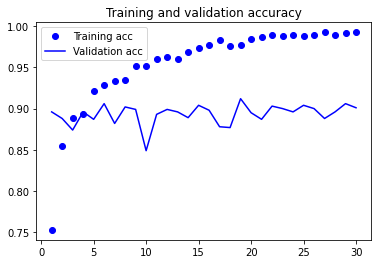

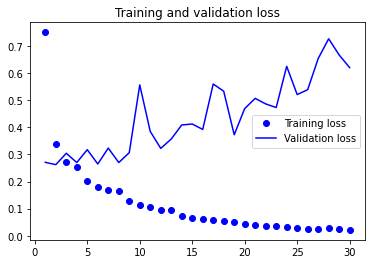

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
# Using Pretrained Model
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

conv_base.summary()

# Adding a densely connected classifier on top of the convolutional base
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights ''after freezing the conv base:', len(model.trainable_weights))


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
# Training the model end to end with a frozen convolutional base 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-19-666f93d246bf>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 23s 217ms/step - loss: 0.7152 - acc: 0.7079 - val_loss: 0.3057 - val_acc: 0.8790
Epoch 2/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4226 - acc: 0.7952 - val_loss: 0.3009 - val_acc: 0.8720
Epoch 3/30
100/100 [==============================] - 21s 205ms/step - loss: 0.4059 - acc: 0.8184 - val_loss: 0.3357 - val_acc: 0.8340
Epoch 4/30
100/100 [==============================] - 21s 207ms/step - loss: 0.3758 - acc: 0.8300 - val_loss: 0.2851 - val_acc: 0.8630
Epoch 5/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3731 - acc: 0.8280 - val_loss: 0.3210 - val_acc: 0.8570
Epoch 6/30
100/100 [==============================] - 22s 217ms/step - loss: 0.3551 - acc: 0.8406 - val_loss: 0.2544 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 20s 199ms/step - loss: 0.3377 - acc: 0.8562 - val_loss: 0.2511 - val_acc: 0.9020
Epoch 8/30
100/100 [==============================] - 2

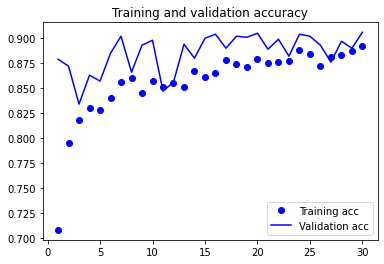

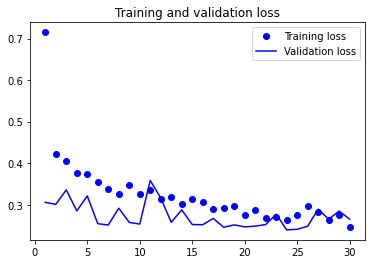

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Freezing all layers upto a specific one

conv_base.summary()
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
        
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

<ipython-input-21-35d09f3557b3>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)


Epoch 1/100
100/100 [==============================] - 23s 204ms/step - loss: 8.8217 - acc: 0.5146 - val_loss: 0.6923 - val_acc: 0.5170
Epoch 2/100
100/100 [==============================] - 21s 210ms/step - loss: 0.9567 - acc: 0.5479 - val_loss: 0.5784 - val_acc: 0.7740
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 0.5967 - acc: 0.7114 - val_loss: 0.3879 - val_acc: 0.8470
Epoch 4/100
100/100 [==============================] - 21s 212ms/step - loss: 0.4692 - acc: 0.7906 - val_loss: 0.2729 - val_acc: 0.8920
Epoch 5/100
100/100 [==============================] - 22s 219ms/step - loss: 0.3774 - acc: 0.8416 - val_loss: 0.2322 - val_acc: 0.9010
Epoch 6/100
100/100 [==============================] - 21s 211ms/step - loss: 0.3367 - acc: 0.8547 - val_loss: 0.3370 - val_acc: 0.8640
Epoch 7/100
100/100 [==============================] - 21s 209ms/step - loss: 0.3440 - acc: 0.8744 - val_loss: 0.2384 - val_acc: 0.9180
Epoch 8/100
100/100 [===========================

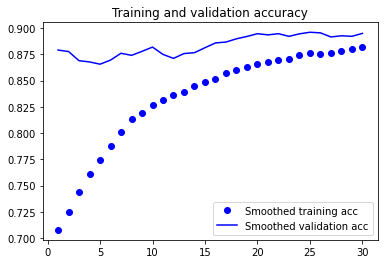

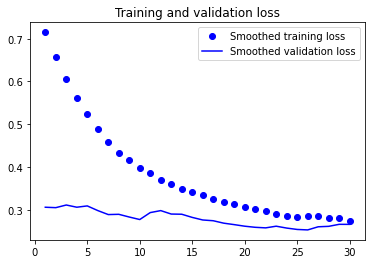

In [ ]:
#Smoothing the plot
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)



Found 1000 images belonging to 2 classes.


<ipython-input-23-b78d01612a66>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9340000152587891


In [ ]:
import shutil 

sourceDir = '/content/drive/My Drive/darknet.zip'
destDir =  '/content/'
shutil.move(sourceDir, destDir)

FileNotFoundError: ignored

In [ ]:
#visualizing the intermediate activations
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/cats_and_dogs_small_1.h5')
model.summary() # As a reminder.

In [ ]:
img_path = '/content/cats and dogs small/test/cats/cat.1510.jpg'
# We preprocess the image into a 4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs that were preprocessed in the following way:
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

from tensorflow.keras import models
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# This will return a list of 5 Numpy arrays:one array per layer activation
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')